# Classical Data Encoding using Amplitude Encoding

## Objective
We demonstrate how to encode classical data into the **amplitudes** of a quantum state vector, normalize the state, convert it into a quantum circuit, and transpile the circuit into a gate set consisting of u1, u2, u3, and CNOT gates.

## Amplitude Encoding Explanation
This method follows **amplitude encoding** because the classical data values are mapped into the amplitudes of the quantum state, see the [glossary](https://pennylane.ai/qml/glossary/quantum_embedding) for details.

### Why is this Amplitude Encoding?
- In **amplitude encoding**, classical data is represented by the amplitudes of the quantum state vector rather than basis states.
- The state vector is constructed such that the classical values are encoded as the probability amplitudes of the quantum system.
- The final quantum state is a **superposition** of basis states with amplitudes determined by the classical data.

### Breakdown of Encoding in This Lab:
1. **Constructing the State Vector (Classical Data to Amplitudes Mapping):**
   - The state vector elements are set to correspond to the normalized classical data.
   - The state is **normalized** to ensure it remains a valid quantum state.

2. **Final Quantum State:**
   - The system is now in a **superposition** where each basis state has an amplitude representing the encoded data.



## Setup

In [28]:
! pip install -q qiskit==1.3.1 pylatexenc

## Step 1: Define the Classical Data and Encode into State Vector

### Mapping Classical Data to Amplitudes

In this example, we select the data `[2,7,6,2,5]` and map it to a 3-qubit quantum state using amplitude encoding.

In [29]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

# --- Step 1: Define the Classical Data and Encode into State Vector ---
# Given dataset [2,7,6,2,5]
classical_data = np.array([2,7,6,2,5], dtype=float)

#Resize the data to be a power of 2 and adding zeros to the rest of the values.
dataset_size = len(classical_data)
power_of_two = 2**int(np.ceil(np.log2(dataset_size)))
padded_data = np.pad(classical_data, (0, power_of_two - dataset_size), constant_values=0)

# Normalize the data to create a valid quantum state
state_vector = padded_data / np.linalg.norm(padded_data)

# Display the normalized state vector
print("Normalized State Vector:")
print(state_vector)

Normalized State Vector:
[0.18411492 0.64440223 0.55234477 0.18411492 0.46028731 0.
 0.         0.        ]


## Step 2: Convert the State Vector into a Quantum Circuit

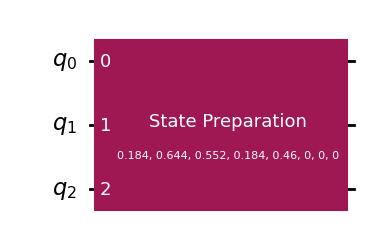

In [30]:
num_qubits = int(np.ceil(np.log2(len(state_vector))))
qc = QuantumCircuit(num_qubits)
initial_state = Statevector(state_vector)
qc.prepare_state(initial_state, range(num_qubits))

# visualize the Circuit
qc.draw(output='mpl')

##  Step 3: Transpile the Circuit into u1, u2, u3, and CNOT Gates
This process is typically exponentially complex because it involves decomposing arbitrary quantum operations into a limited set of elementary gates. For comparison of algorithms please see [this](https://arxiv.org/abs/2407.15745) paper.

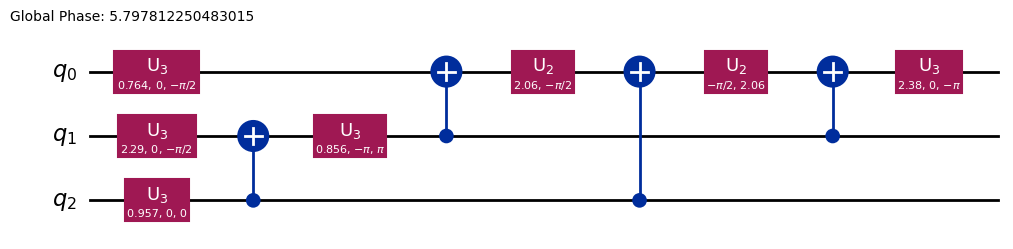

In [31]:
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])

# Display the transpiled circuit
transpiled_circuit.draw(output='mpl')
